In [ ]:
pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import statsmodels.tools as sm
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#The provided Code for importing sav didn't work in colab 
#we converted file to excel then imported here

In [ ]:
import io
df = pd.read_excel('/content/Raw_data_BA_Project.xlsx')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()

,Variable,date,time,Prevent1,Prevent2,Prevent3,Prevent4,Prevent5,Prevent6,Prevent7,Prevent8,Prevent9,PreventNone,FirstStep,Punish,InfoSource1,InfoSource2,InfoSource3,InfoSource4,InfoSource5,InfoSource6,InfoSource7,InfoSource8,ResponseGov,ResponsePub,RootCause,TrustGov,TrustPatron,TrustHealth,TrustMedia,TrustAvia,TrustPolice,TrustMES,TrustEdu,TrustBank,GovAction1,GovAction2,GovAction3,GovAction4,GovAction5,...,GovActAppr1,GovActAppr2,Fear1,Fear2,Fear3,Fear4,Fear5,Remote,GuyRyder,FinImpact1,FinImpact2,FinImpact3,FinImpact4,FinImpact5,FinImpact6,JobForecast,EconExpect1,EconExpect2,EconExpect3,EconExpectNone,Participate1,Participate2,Participate3,Participate4,HowLong,Age,Sex,Marz,LocType,Education,HealthIssues1,HealthIssues2,HealthIssues3,HealthIssues4,HealthIssues5,HealthIssues6,HealthIssues7,HealthIssues8,Income,Age_Range
0,Label,Լրացման օր,Լրացման ժամ,Կորոնավիրուսից պաշտպանվելու գործողություն,Կորոնավիրուսից պաշտպանվելու գործողություն,Կորոնավիրուսից պաշտպանվելու գործողություն,Կորոնավիրուսից պաշտպանվելու գործողություն,Կորոնավիրուսից պաշտպանվելու գործողություն,Կորոնավիրուսից պաշտպանվելու գործողություն,Կորոնավիրուսից պաշտպանվելու գործողություն,Կորոնավիրուսից պաշտպանվելու գործողություն,Կորոնավիրուսից պաշտպանվելու գործողություն,Կորոնավիրուսից պաշտպանվելու գործողություն,Կորոնավիրուսի ախտանշաններ ունենալու պարագայում...,Ըստ Ձեզ՝ մեկուսացման կամ ինքնամեկուսացման պահա...,Տեղեկատվության ո՞ր աղբյուր(ներ)ին եք առավել շա...,Տեղեկատվության ո՞ր աղբյուր(ներ)ին եք առավել շա...,Տեղեկատվության ո՞ր աղբյուր(ներ)ին եք առավել շա...,Տեղեկատվության ո՞ր աղբյուր(ներ)ին եք առավել շա...,Տեղեկատվության ո՞ր աղբյուր(ներ)ին եք առավել շա...,Տեղեկատվության ո՞ր աղբյուր(ներ)ին եք առավել շա...,Տեղեկատվության ո՞ր աղբյուր(ներ)ին եք առավել շա...,Տեղեկատվության ո՞ր աղբյուր(ներ)ին եք առավել շա...,Որքանո՞վ է չափազանցված/թերագնահատված կորոնավիր...,Որքանո՞վ է չափազանցված/թերագնահատված կորոնավիր...,Ձեր կարծիքով ո՞րն է կորոնավիրուսի ծագման և տար...,Հայաստանում հաստատված արտակարգ դրության պայման...,Հայաստանում հաստատված արտակարգ դրության պայման...,Հայաստանում հաստատված արտակարգ դրության պայման...,Հայաստանում հաստատված արտակարգ դրության պայման...,Հայաստանում հաստատված արտակարգ դրության պայման...,Հայաստանում հաստատված արտակարգ դրության պայման...,Հայաստանում հաստատված արտակարգ դրության պայման...,Հայաստանում հաստատված արտակարգ դրության պայման...,Հայաստանում հաստատված արտակարգ դրության պայման...,Որքանո՞վ եք դրական/բացասական համարում Կառավարո...,Որքանո՞վ եք դրական/բացասական համարում Կառավարո...,Որքանո՞վ եք դրական/բացասական համարում Կառավարո...,Որքանո՞վ եք դրական/բացասական համարում Կառավարո...,Որքանո՞վ եք դրական/բացասական համարում Կառավարո...,...,"Որքանո՞վ եք համամիտ, որ Կառավարությունը պետք է...","Որքանո՞վ եք համամիտ, որ Կառավարությունը պետք է...","Որքանո՞վ եք հավանական համարում, որ վարակի արագ...","Որքանո՞վ եք հավանական համարում, որ Ձեր հարազատ...","Որքանո՞վ եք հավանական համարում, որ վարակի պատճ...","Որքանո՞վ եք հավանական համարում, որ վարակի հետև...","Որքանո՞վ եք հավանական համարում, որ վարակի հետև...",Որքանո՞վ է արդյունավետ առցանց սովորելը/դասավան...,Որքանո՞վ եք համաձայն Աշխատանքի միջազգային կազմ...,Ինչպիսի՞ ազդեցություն են թողնում կորոնավիրուսի...,Ինչպիսի՞ ազդեցություն են թողնում կորոնավիրուսի...,Ինչպիսի՞ ազդեցություն են թողնում կորոնավիրուսի...,Ինչպիսի՞ ազդեցություն են թողնում կորոնավիրուսի...,Ինչպիսի՞ ազդեցություն են թողնում կորոնավիրուսի...,Ինչպիսի՞ ազդեցություն են թողնում կորոնավիրուսի...,"Ի՞նչ տեղի կունենա, եթե կորոնավիրուսի պատճառով ...",Տնտեսական ակնկալվող աջակցություն ՀՀ կառավարութ...,Տնտեսական ակնկալվող աջակցություն ՀՀ կառավարութ...,Տնտեսական ակնկալվող աջակցություն ՀՀ կառավարութ...,Տնտեսական ակնկալվող աջակցություն ՀՀ կառավարութ...,Ինչպե՞ս կարող եք մասնակցել կանխարգելմանը։ Հետև...,Ինչպե՞ս կարող եք մասնակցել կանխարգելմանը։ Կամա...,Ինչպե՞ս կարող եք մասնակցել կանխարգելմանը։ Օգնե...,Ինչպե՞ս կարող եք մասնակցել կանխարգելմանը։ Մասն...,Ձեր կարծիքով դեռ որքա՞ն կշարունակվի կորոնավիրո...,Տարիք,Սեռ,Մարզ,Բնակավայրի տեսակ,Ստացած կրթական ամենաբարձր մակարդակը,Առողջական խնդիրներ,Առողջական 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8428 entries, 0 to 8427
Data columns (total 85 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Variable        1 non-null      object
 1   date            8428 non-null   object
 2   time            8428 non-null   object
 3   Prevent1        8428 non-null   object
 4   Prevent2        8006 non-null   object
 5   Prevent3        7506 non-null   object
 6   Prevent4        6047 non-null   object
 7   Prevent5        3767 non-null   object
 8   Prevent6        1847 non-null   object
 9   Prevent7        781 non-null    object
 10  Prevent8        256 non-null    object
 11  Prevent9        56 non-null     object
 12  PreventNone     3 non-null      object
 13  FirstStep       8428 non-null   object
 14  Punish          8428 non-null   object
 15  InfoSource1     8428 non-null   object
 16  InfoSource2     4626 non-null   object
 17  InfoSource3     2540 non-null   object
 18  InfoSour

In [ ]:
df = df.drop(0)

In [ ]:
df = df[['FirstStep', 'Punish', 'ResponseGov',
         'ResponsePub', 'TrustGov',
         'TrustPatron', 'TrustHealth', 'TrustMedia', 
         'TrustAvia', 'TrustPolice', 'TrustMES',
         'TrustEdu', 'TrustBank', 'GovAction1',
         'GovAction2', 'GovAction3', 'GovAction5', 
         'Fear1', 'Fear2', 'Fear3', 'Fear4', 'Fear5',
         'Remote', 'GuyRyder', 'FinImpact1', 'FinImpact2',
         'FinImpact3', 'FinImpact4', 'FinImpact5', 
         'FinImpact6', 'JobForecast', 'HowLong', 'Age',
         'Sex', 'Marz', 'LocType', 'Education', 'Income']]

In [ ]:
df.head()

,FirstStep,Punish,ResponseGov,ResponsePub,TrustGov,TrustPatron,TrustHealth,TrustMedia,TrustAvia,TrustPolice,TrustMES,TrustEdu,TrustBank,GovAction1,GovAction2,GovAction3,GovAction5,Fear1,Fear2,Fear3,Fear4,Fear5,Remote,GuyRyder,FinImpact1,FinImpact2,FinImpact3,FinImpact4,FinImpact5,FinImpact6,JobForecast,HowLong,Age,Sex,Marz,LocType,Education,Income
1,3,3,3,3,5,5,5,3,5,3,4,4,4,4,4,5,5,4,4,3,3,3,3,2,4,3,2,3,3,3,1,2,33,2,5,1,8,2
2,1,3,1,1,5,5,5,4,1,5,5,5,5,5,5,5,5,3,4,1,1,1,5,1,4,5,5,1,5,3,2,1,27,2,2,1,5,7
3,2,3,3,4,4,4,4,3,3,4,4,3,4,5,5,5,5,4,2,2,4,2,3,1,3,2,2,3,2,2,2,2,23,2,5,1,7,4
4,2,3,5,5,4,3,5,3,2,5,5,4,2,-1,3,5,5,1,3,4,4,4,5,1,1,1,1,5,3,3,3,-1,34,1,7,1,6,6
5,1,2,2,5,5,5,5,4,-1,4,5,4,3,5,5,5,5,2,3,2,2,3,2,2,2,2,2,3,3,1,2,2,40,1,5,1,7,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8427 entries, 1 to 8427
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FirstStep    8427 non-null   object
 1   Punish       8427 non-null   object
 2   ResponseGov  8427 non-null   object
 3   ResponsePub  8427 non-null   object
 4   TrustGov     8427 non-null   object
 5   TrustPatron  8427 non-null   object
 6   TrustHealth  8427 non-null   object
 7   TrustMedia   8427 non-null   object
 8   TrustAvia    8427 non-null   object
 9   TrustPolice  8427 non-null   object
 10  TrustMES     8427 non-null   object
 11  TrustEdu     8427 non-null   object
 12  TrustBank    8427 non-null   object
 13  GovAction1   8427 non-null   object
 14  GovAction2   8427 non-null   object
 15  GovAction3   8427 non-null   object
 16  GovAction5   8427 non-null   object
 17  Fear1        8427 non-null   object
 18  Fear2        8427 non-null   object
 19  Fear3        8427 non-null 

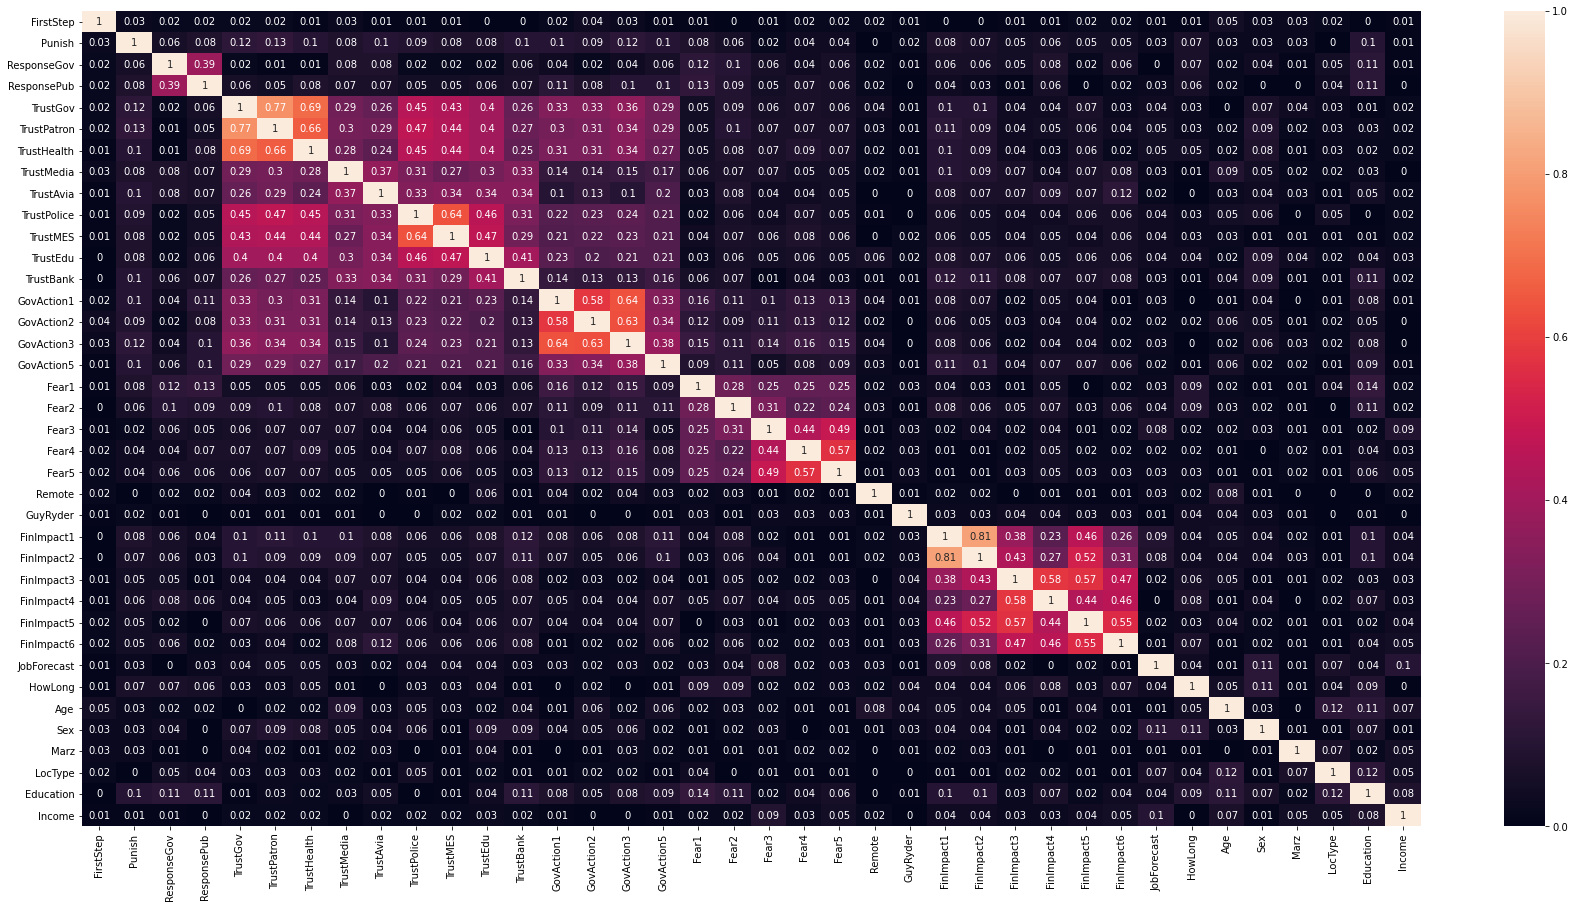

In [ ]:
df1 = df.astype(int)
plt.figure(figsize=(30,15))
sns.heatmap(df1.corr().abs().round(2),annot=True)
plt.show()

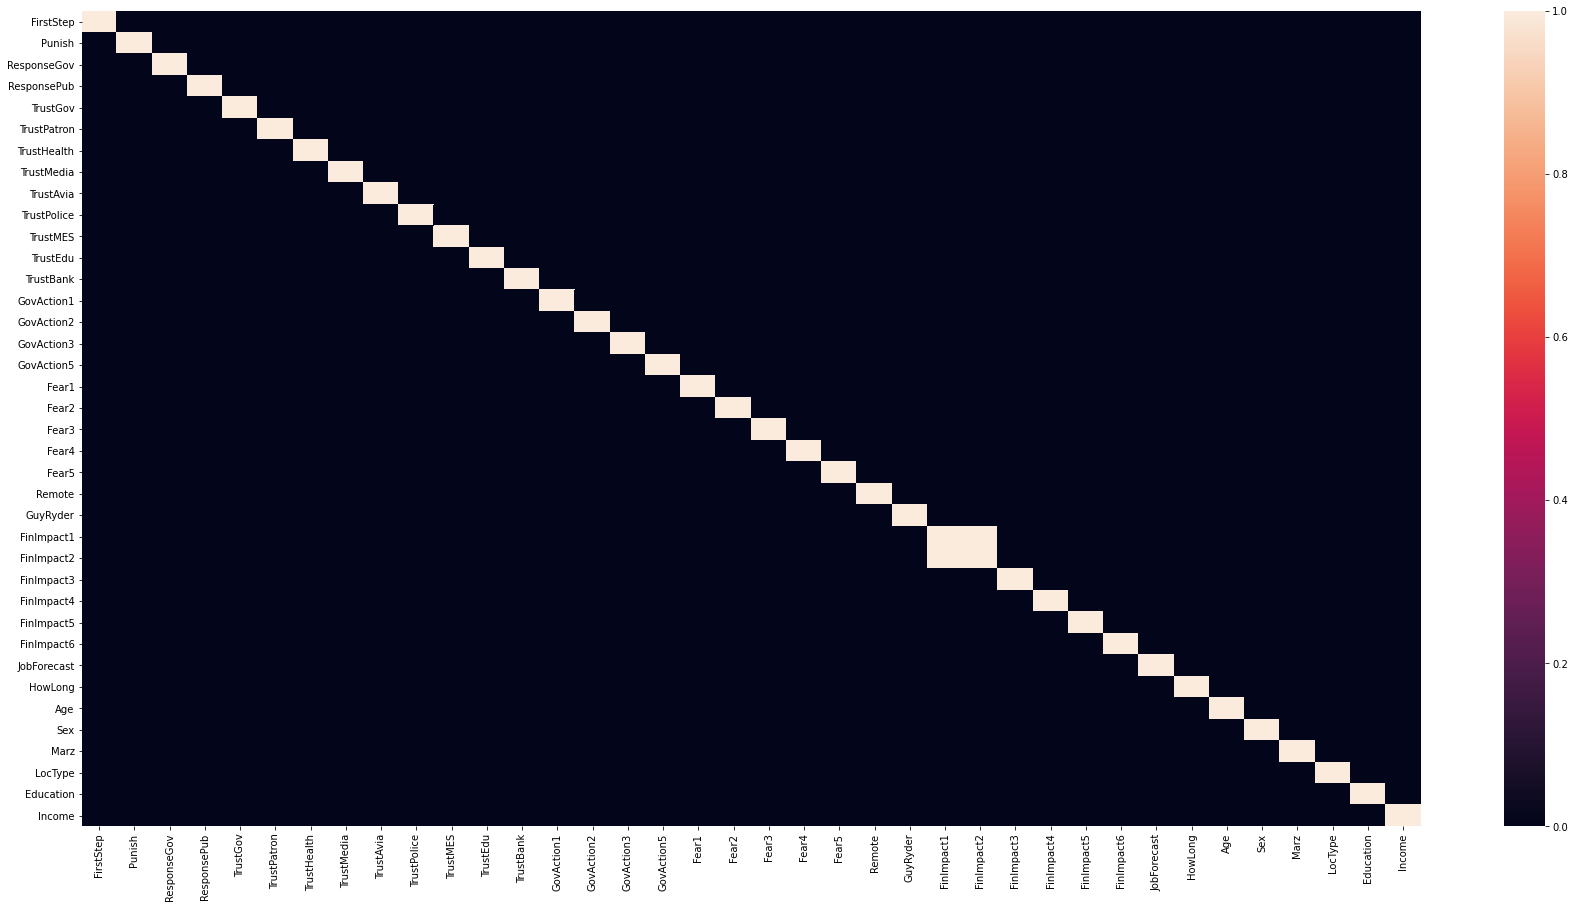

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(df1.corr().abs()>=0.8)
plt.show()

In [ ]:
#Creating dummy variables from objects
df =pd.get_dummies(df,  columns=[ 'Punish', 'Remote', 'HowLong', 'Marz', 'LocType'])

In [ ]:
df = df.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8427 entries, 1 to 8427
Data columns (total 63 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FirstStep    8427 non-null   object
 1   ResponseGov  8427 non-null   object
 2   ResponsePub  8427 non-null   object
 3   TrustGov     8427 non-null   object
 4   TrustPatron  8427 non-null   object
 5   TrustHealth  8427 non-null   object
 6   TrustMedia   8427 non-null   object
 7   TrustAvia    8427 non-null   object
 8   TrustPolice  8427 non-null   object
 9   TrustMES     8427 non-null   object
 10  TrustEdu     8427 non-null   object
 11  TrustBank    8427 non-null   object
 12  GovAction1   8427 non-null   object
 13  GovAction2   8427 non-null   object
 14  GovAction3   8427 non-null   object
 15  GovAction5   8427 non-null   object
 16  Fear1        8427 non-null   object
 17  Fear2        8427 non-null   object
 18  Fear3        8427 non-null   object
 19  Fear4        8427 non-null 

In [ ]:
#Correlation level below 80% is acceptable 

In [ ]:
#checking number of duplicates, missing values and columns with a single value
print("Duplicates:", df.duplicated().sum())
print("Missing values:", df.isna().sum().sum())
print("Single valued columns:", df.columns[df.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')


In [ ]:
df = df.drop_duplicates()

In [ ]:
labels = ['0','1']

#create a new column for the Response seriousness towards covid from public
df['ResponsePub'] = pd.cut(df['ResponsePub'], bins=2, labels=labels)

df

,FirstStep,ResponseGov,ResponsePub,TrustGov,TrustPatron,TrustHealth,TrustMedia,TrustAvia,TrustPolice,TrustMES,TrustEdu,TrustBank,GovAction1,GovAction2,GovAction3,GovAction5,Fear1,Fear2,Fear3,Fear4,Fear5,GuyRyder,FinImpact1,FinImpact2,FinImpact3,FinImpact4,FinImpact5,FinImpact6,JobForecast,Age,Sex,Education,Income,Punish_-1,Punish_0,Punish_1,Punish_2,Punish_3,Remote_-1,Remote_1,Remote_2,Remote_3,Remote_4,Remote_5,HowLong_-1,HowLong_1,HowLong_2,HowLong_3,HowLong_4,HowLong_5,Marz_1,Marz_2,Marz_3,Marz_4,Marz_5,Marz_6,Marz_7,Marz_8,Marz_9,Marz_10,Marz_11,LocType_1,LocType_2
1,3,3,1,5,5,5,3,5,3,4,4,4,4,4,5,5,4,4,3,3,3,2,4,3,2,3,3,3,1,33,2,8,2,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,1,0,5,5,5,4,1,5,5,5,5,5,5,5,5,3,4,1,1,1,1,4,5,5,1,5,3,2,27,2,5,7,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,2,3,1,4,4,4,3,3,4,4,3,4,5,5,5,5,4,2,2,4,2,1,3,2,2,3,2,2,2,23,2,7,4,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,2,5,1,4,3,5,3,2,5,5,4,2,-1,3,5,5,1,3,4,4,4,1,1,1,1,5,3,3,3,34,1,6,6,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,1,2,1,5,5,5,4,-1,4,5,4,3,5,5,5,5,2,3,2,2,3,2,2,2,2,3,3,1,2,40,1,7,3,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8423,4,-1,0,5,5,5,1,3,5,5,4,5,5,5,5,1,4,4,4,4,4,5,1,1,1,3,1,-1,3,22,1,4,6,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8424,1,5,1,4,4,4,4,5,3,5,5,4,5,3,4,3,4,3,4,4,4,5,1,1,1,4,1,1,3,36,2,7,6,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8425,1,5,1,5,5,5,1,2,5,5,1,2,5,5,5,4,4,4,1,4,4,5,5,4,1,1,2,3,2,25,1,5,4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8426,2,3,1,1,1,1,3,-1,2,3,3,3,5,5,5,3,4,2,4,4,4,5,1,1,1,1,1,1,0,20,1,5,-1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 1 to 8427
Data columns (total 63 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   FirstStep    8364 non-null   int64   
 1   ResponseGov  8364 non-null   int64   
 2   ResponsePub  8364 non-null   category
 3   TrustGov     8364 non-null   int64   
 4   TrustPatron  8364 non-null   int64   
 5   TrustHealth  8364 non-null   int64   
 6   TrustMedia   8364 non-null   int64   
 7   TrustAvia    8364 non-null   int64   
 8   TrustPolice  8364 non-null   int64   
 9   TrustMES     8364 non-null   int64   
 10  TrustEdu     8364 non-null   int64   
 11  TrustBank    8364 non-null   int64   
 12  GovAction1   8364 non-null   int64   
 13  GovAction2   8364 non-null   int64   
 14  GovAction3   8364 non-null   int64   
 15  GovAction5   8364 non-null   int64   
 16  Fear1        8364 non-null   int64   
 17  Fear2        8364 non-null   int64   
 18  Fear3        8364 non-null  

In [ ]:
df = df.astype(int)

In [ ]:
#seperating x and y
Y=df["ResponsePub"]
X=df.drop("ResponsePub",axis=1)
#adding constant
X=sm.add_constant(X)


In [ ]:
#Train-test split
X0, X1, Y0, Y1=train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
model=Logit(Y0,X0)
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.574504
         Iterations 10


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            ResponsePub   No. Observations:                 6273
Model:                          Logit   Df Residuals:                     6215
Method:                           MLE   Df Model:                           57
Date:                Mon, 17 May 2021   Pseudo R-squ.:                  0.1142
Time:                        14:53:46   Log-Likelihood:                -3603.9
converged:                       True   LL-Null:                       -4068.5
Covariance Type:            nonrobust   LLR p-value:                6.819e-158
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0981        nan        nan        nan         nan         nan
FirstStep      -0.0264      0.017     -1.538      0.124      -0.060       0.007
ResponseGov     0.4446      0.020     22.191      0.000       0.405       0.484
TrustGov        0.0990      0.036      2.743      0.006       0.028       0.170
TrustPatron    -0.0668      0.034     -1.989      0.047      -0.133      -0.001
TrustHealth     0.0409      0.031      1.341      0.180      -0.019       0.101
TrustMedia      0.0459      0.024      1.877      0.060      -0.002       0.094
TrustAvia       0.0145      0.017      0.830      0.407      -0.020       0.049
TrustPolice     0.0028      0.025      0.115      0.909      -0.045       0.051
TrustMES       -0.0016      0.022     -0.070      0.944      -0.045       0.042
TrustEdu        0.0129      0.021      0.627      0.531      -0.027       0.053
TrustBank      -0.0008      0.020     -0.042      0.967      -0.039       0.038
GovAction1      0.0417      0.029      1.426      0.154      -0.016       0.099
GovAction2     -0.0157      0.026     -0.605      0.545      -0.067       0.035
GovAction3      0.0749      0.030      2.472      0.013       0.016       0.134
GovAction5      0.0232      0.018      1.287      0.198      -0.012       0.059
Fear1           0.0855      0.024      3.596      0.000       0.039       0.132
Fear2           0.0090      0.020      0.440      0.660      -0.031       0.049
Fear3          -0.0210      0.024     -0.883      0.377      -0.068       0.026
Fear4           0.0621      0.023      2.715      0.007       0.017       0.107
Fear5          -0.0070      0.023     -0.300      0.764      -0.053       0.039
GuyRyder       -0.0034      0.018     -0.191      0.849      -0.038       0.031
FinImpact1      0.0719      0.038      1.888      0.059      -0.003       0.147
FinImpact2     -0.0783      0.041     -1.910      0.056      -0.159       0.002
FinImpact3     -0.0517      0.029     -1.806      0.071      -0.108       0.004
FinImpact4      0.0343      0.022      1.545      0.122      -0.009       0.078
FinImpact5     -0.0423      0.029     -1.437      0.151      -0.100       0.015
FinImpact6     -0.0085      0.022     -0.387      0.699      -0.052       0.035
JobForecast    -0.0755      0.022     -3.406      0.001      -0.119      -0.032
Age            -0.0002      0.003     -0.064      0.949      -0.006       0.005
Sex            -0.0017      0.064     -0.027      0.979      -0.128       0.125
Education       0.0878      0.027      3.256      0.001       0.035       0.141
Income         -0.0026      0.010     -0.267      0.790      -0.022       0.017
Punish_-1      -0.1310   1.32e+06  -9.92e-08      1.000   -2.59e+06    2.59e+06
Punish_0       -0.6313   1.33e+06  -4.76e-07      1.000    -2.6e+06     2.6e+06
Punish_1       -0.1023   1.32e+06  -7.74e-08      1.000   -2.59e+06    2.59e+06
Punish_2       -0.1379   1.33e+06  -1.04e-07      1.000   -2.61e+06    2.61e+06
Punish_3       -0.0956   1.32e+06  -7.22e

In [ ]:
## Dropping variables with extremely low p - value
df_final=df.drop(["Punish_-1", "Punish_0", "Punish_1", "Punish_2", "Punish_3", 
                 "Remote_-1", "Remote_1", "Remote_2", "Remote_3", 
                 "Remote_4", "Remote_5", "Marz_1", "Marz_2", "Marz_3", "Marz_4", "Marz_5",
                 "Marz_6", "Marz_7", "Marz_8", "Marz_9", "Marz_10", "Marz_11"],axis=1)

In [ ]:
#seperating x and y
Y=df_final["ResponsePub"]
X=df_final.drop("ResponsePub",axis=1)
#adding constant
X=sm.add_constant(X)

In [ ]:
#Train-test split
X0, X1, Y0, Y1=train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
model=Logit(Y0,X0)
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.577988
         Iterations 7


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            ResponsePub   No. Observations:                 6273
Model:                          Logit   Df Residuals:                     6234
Method:                           MLE   Df Model:                           38
Date:                Mon, 17 May 2021   Pseudo R-squ.:                  0.1088
Time:                        14:53:54   Log-Likelihood:                -3625.7
converged:                       True   LL-Null:                       -4068.5
Covariance Type:            nonrobust   LLR p-value:                3.588e-161
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.4200        nan        nan        nan         nan         nan
FirstStep      -0.0309      0.017     -1.816      0.069      -0.064       0.002
ResponseGov     0.4464      0.020     22.342      0.000       0.407       0.486
TrustGov        0.1003      0.036      2.800      0.005       0.030       0.171
TrustPatron    -0.0616      0.033     -1.849      0.065      -0.127       0.004
TrustHealth     0.0407      0.030      1.339      0.181      -0.019       0.100
TrustMedia      0.0421      0.024      1.731      0.083      -0.006       0.090
TrustAvia       0.0146      0.017      0.839      0.401      -0.019       0.049
TrustPolice     0.0043      0.024      0.174      0.862      -0.044       0.052
TrustMES       -0.0011      0.022     -0.047      0.962      -0.045       0.043
TrustEdu        0.0189      0.020      0.932      0.351      -0.021       0.059
TrustBank       0.0027      0.019      0.137      0.891      -0.035       0.041
GovAction1      0.0512      0.029      1.759      0.079      -0.006       0.108
GovAction2     -0.0135      0.026     -0.521      0.602      -0.064       0.037
GovAction3      0.0767      0.030      2.555      0.011       0.018       0.135
GovAction5      0.0266      0.018      1.483      0.138      -0.009       0.062
Fear1           0.0879      0.024      3.717      0.000       0.042       0.134
Fear2           0.0119      0.020      0.582      0.561      -0.028       0.052
Fear3          -0.0201      0.024     -0.847      0.397      -0.067       0.026
Fear4           0.0612      0.023      2.691      0.007       0.017       0.106
Fear5          -0.0083      0.023     -0.356      0.722      -0.054       0.037
GuyRyder       -0.0086      0.018     -0.489      0.625      -0.043       0.026
FinImpact1      0.0788      0.038      2.077      0.038       0.004       0.153
FinImpact2     -0.0789      0.041     -1.929      0.054      -0.159       0.001
FinImpact3     -0.0547      0.029     -1.919      0.055      -0.111       0.001
FinImpact4      0.0358      0.022      1.623      0.105      -0.007       0.079
FinImpact5     -0.0397      0.029     -1.353      0.176      -0.097       0.018
FinImpact6     -0.0087      0.022     -0.397      0.691      -0.052       0.034
JobForecast    -0.0765      0.022     -3.486      0.000      -0.120      -0.033
Age             0.0010      0.003      0.354      0.723      -0.005       0.007
Sex             0.0147      0.064      0.231      0.818      -0.110       0.140
Education       0.0968      0.027      3.630      0.000       0.045       0.149
Income         -0.0052      0.010     -0.532      0.595      -0.024       0.014
HowLong_-1     -0.2844        nan        nan        nan         nan         nan
HowLong_1      -0.2029        nan        nan        nan         nan         nan
HowLong_2      -0.1368        nan        nan        nan         nan         nan
HowLong_3      -0.3081        nan        nan        nan         nan         nan
HowLong_4      -0.2650        nan        

In [ ]:
results.get_margeff().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:            ResponsePub
Method:                          dydx
At:                           overall
===============================================================================
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
FirstStep      -0.0061      0.003     -1.817      0.069      -0.013       0.000
ResponseGov     0.0876      0.003     26.388      0.000       0.081       0.094
TrustGov        0.0197      0.007      2.810      0.005       0.006       0.033
TrustPatron    -0.0121      0.007     -1.852      0.064      -0.025       0.001
TrustHealth     0.0080      0.006      1.340      0.180      -0.004       0.020
TrustMedia      0.0083      0.005      1.732      0.083      -0.001       0.018
TrustAvia       0.0029      0.003      0.840      0.401      -0.004       0.010
TrustPolice     0.0008      0.005      0.174      0.862      -0.009       0.010
TrustMES       -0.0002      0.004     -0.047      0.962      -0.009       0.008
TrustEdu        0.0037      0.004      0.932      0.351      -0.004       0.012
TrustBank       0.0005      0.004      0.137      0.891      -0.007       0.008
GovAction1      0.0100      0.006      1.762      0.078      -0.001       0.021
GovAction2     -0.0027      0.005     -0.521      0.602      -0.013       0.007
GovAction3      0.0150      0.006      2.560      0.010       0.004       0.027
GovAction5      0.0052      0.004      1.483      0.138      -0.002       0.012
Fear1           0.0172      0.005      3.733      0.000       0.008       0.026
Fear2           0.0023      0.004      0.582      0.561      -0.006       0.010
Fear3          -0.0039      0.005     -0.847      0.397      -0.013       0.005
Fear4           0.0120      0.004      2.696      0.007       0.003       0.021
Fear5          -0.0016      0.005     -0.356      0.722      -0.011       0.007
GuyRyder       -0.0017      0.003     -0.489      0.625      -0.008       0.005
FinImpact1      0.0155      0.007      2.080      0.038       0.001       0.030
FinImpact2     -0.0155      0.008     -1.931      0.054      -0.031       0.000
FinImpact3     -0.0107      0.006     -1.920      0.055      -0.022       0.000
FinImpact4      0.0070      0.004      1.624      0.104      -0.001       0.015
FinImpact5     -0.0078      0.006     -1.355      0.175      -0.019       0.003
FinImpact6     -0.0017      0.004     -0.397      0.691      -0.010       0.007
JobForecast    -0.0150      0.004     -3.500      0.000      -0.023      -0.007
Age             0.0002      0.001      0.354      0.723      -0.001       0.001
Sex             0.0029      0.013      0.231      0.818      -0.022       0.027
Education       0.0190      0.005      3.649      0.000       0.009       0.029
Income         -0.0010      0.002     -0.532      0.595      -0.005       0.003
HowLong_-1     -0.0558        nan        nan        nan         nan         nan
HowLong_1      -0.0398        nan        nan        nan         nan         nan
HowLong_2      -0.0268        nan        nan        nan         nan         nan
HowLong_3      -0.0605        nan        nan        nan         nan         nan
HowLong_4      -0.0520        nan        nan        nan         nan         nan
HowLong_5      -0.0437        nan        nan        nan         nan         nan
LocType_1      -0.1280   3.61e+05  -3.54e-07      1.000   -7.09e+05    7.09e+05
LocType_2      -0.1507   3.61e+05  -4.17e-07      1.000   -7.09e+05    7.09e+05
===============================================================================
"""

In [ ]:
results.pred_table().T



array([[ 862.,  423.],
       [1345., 3643.]])

In [ ]:
results.pred_table(0.7).T

array([[1568., 1546.],
       [ 639., 2520.]])

In [ ]:
Y1_hat=results.predict(X1)
Y0_hat=results.predict(X0)

In [ ]:
Y1_class=np.where(Y1_hat>=0.5,1,0)
Y0_class=np.where(Y0_hat>=0.5,1,0)

In [ ]:
print("ROC_AUC Train:",roc_auc_score(Y0,Y0_hat).round(2))
print("ROC_AUC Test:",roc_auc_score(Y1,Y1_hat).round(2))

ROC_AUC Train: 0.72
ROC_AUC Test: 0.68


In [ ]:
#confusion matrix for the train data
cm_train=confusion_matrix(Y0,Y0_class).T

In [ ]:
print("Accuracy_train:", (cm_train[0,0]+cm_train[1,1])/len(Y0))
print("Sensitivity_train:",cm_train[1,1]/(cm_train[1,1]+cm_train[0,1]))
print("Specificity_train:",cm_train[0,0]/(cm_train[0,0]+cm_train[1,0]))

Accuracy_train: 0.7181571815718157
Sensitivity_train: 0.8959665518937531
Specificity_train: 0.39057544177616677


In [ ]:
#confusion matrix for the test data
cm_test=confusion_matrix(Y1,Y1_class).T

In [ ]:
#let's calculate overall accuracy, recall and specificity for test data
print("Accuracy_test:", (cm_test[0,0]+cm_test[1,1])/len(Y1))
print("Sensitivity_test:",cm_test[1,1]/(cm_test[1,1]+cm_test[0,1]))
print("Specificity_test:",cm_test[0,0]/(cm_test[0,0]+cm_test[1,0]))

Accuracy_test: 0.7144906743185079
Sensitivity_test: 0.9035792549306063
Specificity_test: 0.3559556786703601


In [ ]:
## The confusion matrix results are nearly identical (except for specificity), therefore no signs of overfitting/underfitting

In [ ]:
#calculating using classification report
print("Logistic Regression Train:")
print(classification_report(Y0,Y0_class))

print("Logistic Regression Test:")
print(classification_report(Y1,Y1_class))

Logistic Regression Train:
              precision    recall  f1-score   support

           0       0.67      0.39      0.49      2207
           1       0.73      0.90      0.80      4066

    accuracy                           0.72      6273
   macro avg       0.70      0.64      0.65      6273
weighted avg       0.71      0.72      0.70      6273

Logistic Regression Test:
              precision    recall  f1-score   support

           0       0.66      0.36      0.46       722
           1       0.73      0.90      0.81      1369

    accuracy                           0.71      2091
   macro avg       0.69      0.63      0.63      2091
weighted avg       0.70      0.71      0.69      2091



In [ ]:
#summarizing the results into a dataframe
results_summary=pd.DataFrame({"Accuracy":[accuracy_score(Y0,Y0_class),accuracy_score(Y1,Y1_class)],
                              "ROC_AUC":[roc_auc_score(Y0,Y0_hat),roc_auc_score(Y1, Y1_hat)],
                              "Recall":[recall_score(Y0, Y0_class),recall_score(Y1, Y1_class)]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall
Training set,0.718157,0.716201,0.895967
Testing set,0.714491,0.684257,0.903579


In [ ]:
dt=DecisionTreeClassifier(random_state=1)
dt.fit(X0,Y0)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
#calculating probabilities
Y0_dt=dt.predict_proba(X0)[:,1]
Y1_dt=dt.predict_proba(X1)[:,1]

In [ ]:
#setting up the ranges for hyperparameters with grid search
param_dt={"max_depth":range(1,15),
          "min_samples_leaf":range(10,150,10),
          "class_weight":["balanced",None]        
            }

In [ ]:
#Cross-Validated Gridsearch
gs_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=1), param_grid=param_dt,
                  scoring="roc_auc",cv=5)
gs_dt.fit(X0,Y0)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': range(1, 15),
              

In [ ]:
#the optimal parameters
best_params = gs_dt.best_params_
best_params

{'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 70}

In [ ]:
dt_grid=DecisionTreeClassifier(class_weight='balanced',max_depth=4,min_samples_leaf=70, random_state=1).fit(X0,Y0)

In [ ]:
Y0_dt_grid=dt_grid.predict_proba(X0)[:,1]
Y1_dt_grid=dt_grid.predict_proba(X1)[:,1]
print("ROC_AUC Train for tuned DT:",roc_auc_score(Y0,Y0_dt_grid).round(2))
print("ROC_AUC Test for tuned DT:",roc_auc_score(Y1,Y1_dt_grid).round(2))
print("Mean 5-fold ROC AUC score for Tuned DT",np.mean(cross_val_score(estimator=dt_grid,X=X,y=Y,cv=5, scoring="roc_auc")).round(2))

ROC_AUC Train for tuned DT: 0.73
ROC_AUC Test for tuned DT: 0.69
Mean 5-fold ROC AUC score for Tuned DT 0.71


In [ ]:
#property returning feature importances as array
dt_grid.feature_importances_

array([0.        , 0.00440272, 0.81261283, 0.07535745, 0.        ,
       0.        , 0.02459223, 0.        , 0.        , 0.0135711 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01505706, 0.01940639, 0.0146928 , 0.        , 0.        ,
       0.        , 0.00920447, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01110296, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
#making a dataframe for convenient usage
feat_imp=pd.DataFrame(dt_grid.feature_importances_,index=X.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp.head(10)

,Feature_imp
ResponseGov,0.812613
TrustGov,0.075357
TrustMedia,0.024592
Fear1,0.019406
GovAction5,0.015057
Fear2,0.014693
TrustMES,0.013571
Income,0.011103
GuyRyder,0.009204
FirstStep,0.004403


In [ ]:
#building GridSearch with Logistic Regression
logit=LogisticRegression(random_state=1)

param_logit={"class_weight":["balanced",None],
            "C":np.linspace(0.0001,50,20)}


gs_logit=GridSearchCV(estimator=logit,
                      param_grid=param_logit,
                      scoring="roc_auc", cv=5, verbose=1, n_jobs=2).fit(X0,Y0)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   21.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   22.0s finished


In [ ]:
#finding out the best parameters
gs_logit.best_params_

{'C': 34.21055789473684, 'class_weight': None}

In [ ]:
#building logit with best params and seeing the results
logit_grid=LogisticRegression(C=0.0001,class_weight='balanced',random_state=1).fit(X0,Y0)

Y0_logit=logit_grid.predict_proba(X0)[:,1]
Y1_logit=logit_grid.predict_proba(X1)[:,1]
print("ROC_AUC Train for tuned Logit:",roc_auc_score(Y0,Y0_logit).round(2))
print("ROC_AUC Test for tuned Logit:",roc_auc_score(Y1,Y1_logit).round(2))
print("Mean 5-fold ROC AUC score for Tuned Logit",np.mean(cross_val_score(estimator=logit_grid,X=X,y=Y,cv=5, scoring="roc_auc")).round(2))

ROC_AUC Train for tuned Logit: 0.7
ROC_AUC Test for tuned Logit: 0.66
Mean 5-fold ROC AUC score for Tuned Logit 0.69


In [ ]:
print(param_dt)

{'max_depth': range(1, 15), 'min_samples_leaf': range(10, 150, 10), 'class_weight': ['balanced', None]}


In [ ]:
#building GridSearch for RF using DT's hyperparameters ranges
gs_rf=GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                  param_grid=param_dt, scoring="roc_auc", cv=3, n_jobs=2).fit(X0,Y0)

In [ ]:
#outlining best parameters
gs_rf.best_params_

{'class_weight': 'balanced', 'max_depth': 14, 'min_samples_leaf': 10}

In [ ]:
#building RF with the best parameters
rf_grid=RandomForestClassifier(class_weight= 'balanced' ,max_depth=7,min_samples_leaf=10, random_state=1).fit(X0,Y0)

Y0_rf_grid=rf_grid.predict_proba(X0)[:,1]
Y1_rf_grid=rf_grid.predict_proba(X1)[:,1]
print("ROC_AUC Train for tuned Logit:",roc_auc_score(Y0,Y0_rf_grid).round(2))
print("ROC_AUC Test for tuned Logit:",roc_auc_score(Y1,Y1_rf_grid).round(2))
print("Mean 5-fold ROC AUC score for Tuned RF",np.mean(cross_val_score(estimator=rf_grid,X=X,y=Y,cv=5, scoring="roc_auc")).round(2))

ROC_AUC Train for tuned Logit: 0.81
ROC_AUC Test for tuned Logit: 0.72
Mean 5-fold ROC AUC score for Tuned RF 0.73


In [ ]:
#As we see, Random Forest outperforms the two other models on mean 5-fold cross validation score.

print("Mean 5-fold ROC AUC score for Tuned DT",np.mean(cross_val_score(estimator=dt_grid,X=X,y=Y,cv=5, scoring="roc_auc")).round(2))
print("Mean 5-fold ROC AUC score for Tuned RF",np.mean(cross_val_score(estimator=rf_grid,X=X,y=Y,cv=5, scoring="roc_auc")).round(2))
print("Mean 5-fold ROC AUC score for Tuned Logit",np.mean(cross_val_score(estimator=logit_grid,X=X,y=Y,cv=5, scoring="roc_auc")).round(2))

Mean 5-fold ROC AUC score for Tuned DT 0.71
Mean 5-fold ROC AUC score for Tuned RF 0.73
Mean 5-fold ROC AUC score for Tuned Logit 0.69


Charts for model comparission

In [ ]:
#setting up the needed metrics
FPR, TPR, thresholds=roc_curve(Y1, logit_grid.predict_proba(X1)[:,1])

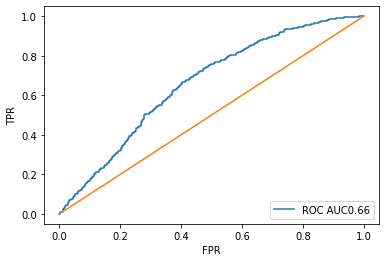

In [ ]:
## As we can see area under the curve is signficiantly larger than for the random guess.
## The best cut-off is between 0.5-0.7 , however we are more interested in Specificity as policymakes
## need to target those who disregard the pandemic in the first place

Gain and lift curve plots for the Logistic Regression


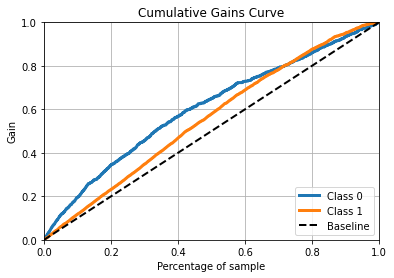

In [ ]:
skplt.metrics.plot_cumulative_gain(Y1,logit_grid.predict_proba(X1))
plt.show()

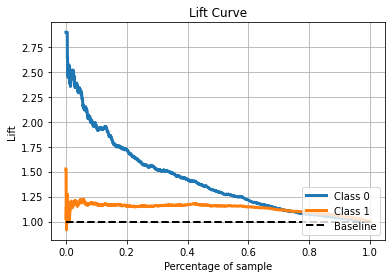

In [ ]:
skplt.metrics.plot_lift_curve(Y1,logit_grid.predict_proba(X1))
plt.show()
